In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA")
import dsa2000_sensitivity
import importlib
importlib.reload(dsa2000_sensitivity)
import scipy.integrate

In [2]:
#antlocs_filepath = "/Users/ruby/Astro/20210226W.cfg"
c = 3e8
min_freq_hz = 0.7e9
max_freq_hz = 2e9
freq_21cm_hz = c/0.21
#antenna_diameter_m = 5
vis_noise = 1.

In [3]:
antpos = dsa2000_sensitivity.get_antpos()

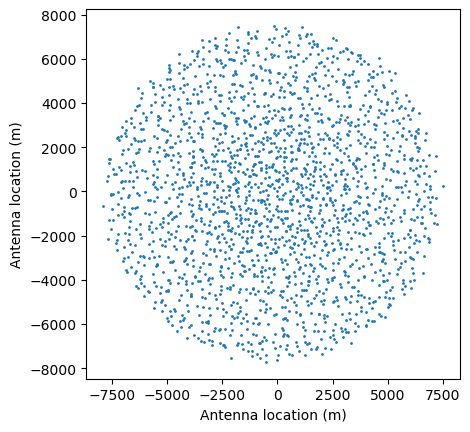

In [4]:
fig, ax = plt.subplots()
ax.scatter(antpos[:,0], antpos[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("Antenna location (m)")
ax.set_ylabel("Antenna location (m)")
plt.show()

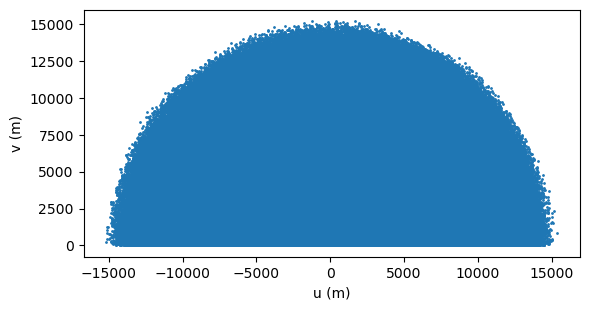

In [5]:
baselines_m = dsa2000_sensitivity.get_baselines(antpos)
fig, ax = plt.subplots()
ax.scatter(baselines_m[:,0], baselines_m[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("u (m)")
ax.set_ylabel("v (m)")
plt.show()

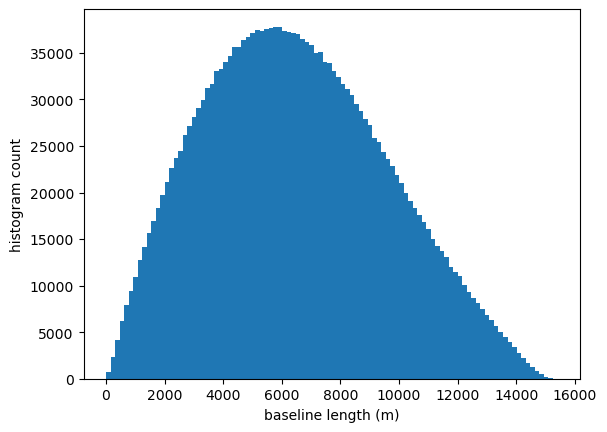

In [77]:
plt.hist(np.sqrt(np.sum(baselines_m**2., axis=1)), bins=100)
plt.xlabel("baseline length (m)")
plt.ylabel("histogram count")
plt.show()

In [89]:
print(np.max(np.sqrt(np.sum(baselines_m**2., axis=1))))
print(np.min(np.sqrt(np.sum(baselines_m**2., axis=1))))

15393.622563988927
8.849800732219943


In [6]:
# Image PS calculation, needs to be fixed

if False:

    field_of_view_deg2 = 10.6
    min_freq_hz = 0.7e9
    max_freq_hz = c / 0.21
    antenna_diameter_m = 5
    freq_resolution_hz = 162.5e3
    #freq_resolution_hz = 0.05e9
    uv_extent = 1000
    int_time_s = 1
    aperture_efficiency = 0.62
    tsys_k = 25
    u_coords_wl, v_coords_wl, freq_array_hz, uvf_variance = dsa2000_sensitivity.generate_uvf_variance(
        save_filepath=None,
        field_of_view_deg2=field_of_view_deg2,
        min_freq_hz=min_freq_hz,
        max_freq_hz=max_freq_hz,
        antenna_diameter_m=antenna_diameter_m,
        freq_resolution_hz=freq_resolution_hz,
        uv_extent=uv_extent,
        tsys_k=tsys_k,
        aperture_efficiency=aperture_efficiency,
        int_time_s=int_time_s
    )

In [7]:
#f = open("/Users/ruby/Downloads/camb_61237059_matterpower_z0.67.dat", "r")
f = open("/Users/ruby/Astro/dsa2000_sensitivity_analysis/camb_49591724_matterpower_z0.5.dat", "r")
file_data = f.readlines()
f.close()

In [8]:
file_data[0].split()[1]

'0.34668E+03'

In [9]:
k = []
power = []
for line in file_data:
    k.append(float(line.split()[0]))
    power.append(float(line.split()[1]))

(0.01, 1.0)

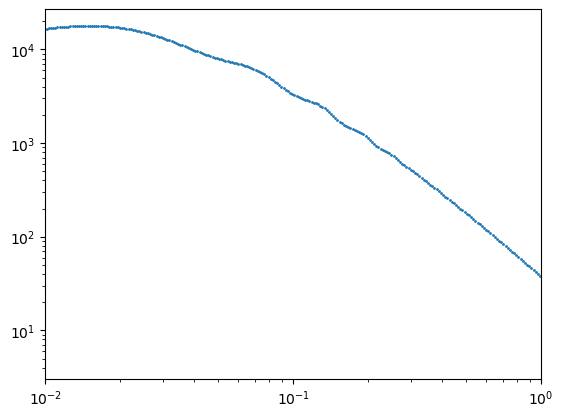

In [10]:
plt.scatter(k, power, s=1)
plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-2,1e0])

In [11]:
#power_new = dsa2000_sensitivity.matter_ps_to_21cm_ps_conversion(np.array(k), np.array(power), 0.67)
power_new = dsa2000_sensitivity.matter_ps_to_21cm_ps_conversion(np.array(k), np.array(power), 0.5)

(0.01, 7)

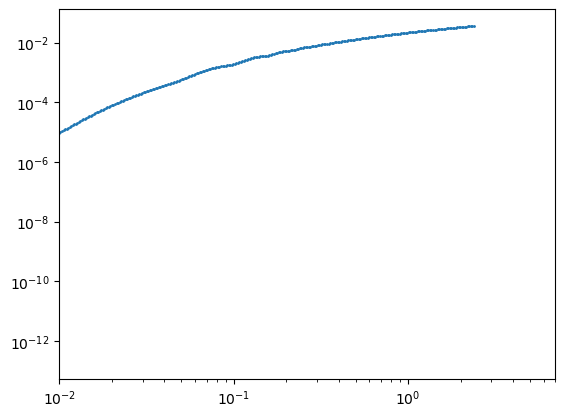

In [12]:
plt.scatter(k, power_new, s=1)
plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-2,7])
#plt.ylim(1e-5,2e-2)

In [13]:
ps_model, model_k_axis = dsa2000_sensitivity.get_ps_model_Paul2023(z=0.32)

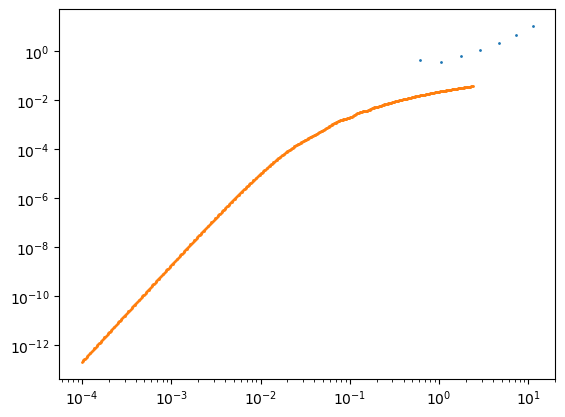

In [14]:
plt.scatter(model_k_axis, ps_model, s=1)
plt.scatter(k, power_new, s=1)
plt.yscale("log")
plt.xscale("log")
#plt.xlim([1e-2,1e0])
#plt.ylim(1e-5,2e-2)

In [15]:
nsamples, bin_centers, binned_ps_variance, nsamples_2d, bin_centers_kperp, bin_centers_kpar, binned_ps_variance_2d = dsa2000_sensitivity.delay_ps_sensitivity_analysis()

In [16]:
print(bin_centers_kpar)

[0.06005936 0.18017807 0.30029678 0.42041549 0.5405342  0.66065292
 0.78077163 0.90089034 1.02100905 1.14112776 1.26124648 1.38136519
 1.5014839  1.62160261 1.74172132 1.86184004 1.98195875 2.10207746
 2.22219617 2.34231488 2.4624336  2.58255231 2.70267102 2.82278973
 2.94290844 3.06302716 3.18314587 3.30326458 3.42338329 3.543502
 3.66362072 3.78373943 3.90385814 4.02397685 4.14409556 4.26421428
 4.38433299 4.5044517  4.62457041 4.74468912 4.86480784 4.98492655
 5.10504526 5.22516397 5.34528268 5.4654014  5.58552011 5.70563882
 5.82575753 5.94587624]


In [17]:
print(binned_ps_variance)

[2.51841624e-04 3.44112025e-05 1.19640371e-05 6.02937846e-06
 3.57250888e-06 2.31592589e-06 1.58099722e-06 1.15552928e-06
 8.88106482e-07 7.00114978e-07 5.57726200e-07 4.67387745e-07
 3.86764130e-07 3.27004610e-07 2.82049367e-07 2.43390296e-07
 2.14633185e-07 1.89407026e-07 1.68652524e-07 1.52137613e-07
 1.37895921e-07 1.25544676e-07 1.14392523e-07 1.05244470e-07
 9.76049544e-08 9.71538958e-08 1.14617357e-07 1.23972255e-07
 1.30499030e-07 1.35573976e-07 1.39713361e-07 1.43195332e-07
 1.46152621e-07 1.48751264e-07 1.51008343e-07 1.53027359e-07
 1.54808729e-07 1.56408536e-07 1.57866605e-07 1.59187665e-07
 1.60375323e-07 1.61475667e-07 1.62543266e-07 1.73592845e-07
 2.00603079e-07 2.41785152e-07 3.08707221e-07 4.31438915e-07
 7.27749114e-07 2.36850071e-06]


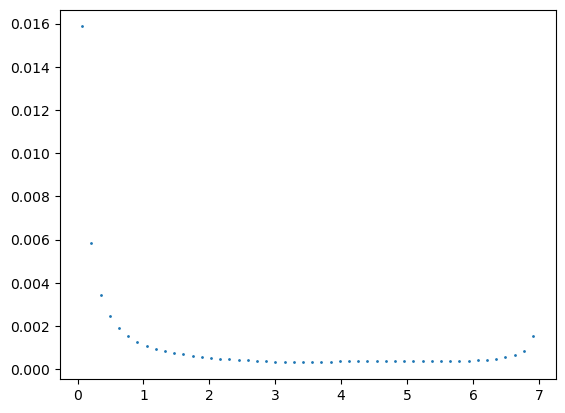

In [18]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)

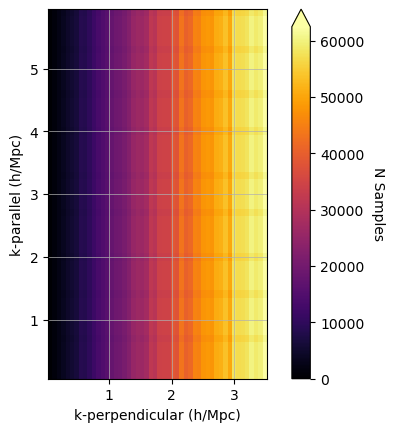

In [19]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    nsamples_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("k-perpendicular (h/Mpc)")
ax.set_ylabel("k-parallel (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("N Samples", rotation=270, labelpad=15)
plt.show()

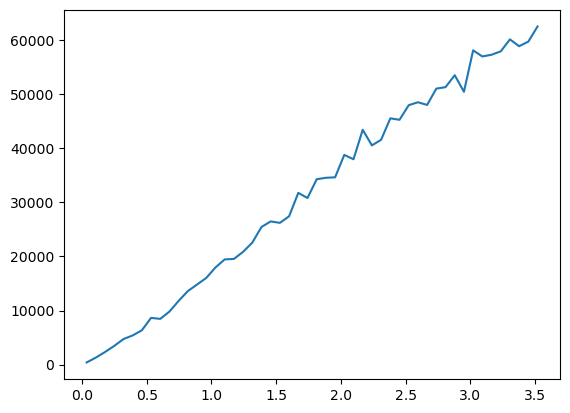

In [86]:
plt.plot(bin_centers_kperp, nsamples_2d[:,10])

In [ ]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    nsamples_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
plt.plot(nsamples_2d[:,10])
ax.set_xlabel("k-perpendicular (h/Mpc)")
ax.set_ylabel("k-parallel (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("N Samples", rotation=270, labelpad=15)
plt.show()

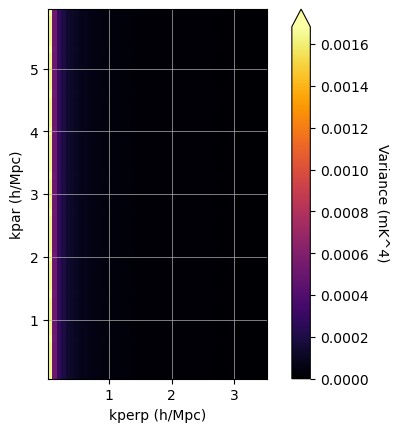

In [20]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    binned_ps_variance_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("kperp (h/Mpc)")
ax.set_ylabel("kpar (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("Variance (mK^4)", rotation=270, labelpad=15)
plt.show()

In [21]:
all_sky_size_sr = 3 * np.pi
all_sky_size_deg2 = all_sky_size_sr * (180/np.pi)**2.
field_of_view_deg2 = 10.6
n_fields = all_sky_size_deg2 / field_of_view_deg2

In [22]:
print(n_fields)

2918.8415978362696


In [132]:
# Total observing days
15*n_fields/60./24.

30.404599977461142

In [24]:
# Total observing seconds
15*n_fields*60.

2626957.4380526426

In [26]:
# Figure out what uv extent is needed
freq_resolution_hz = 162.5e3
print(np.max(bin_centers_kperp))
kx_test, ky_test, kz_test = dsa2000_sensitivity.uvf_to_cosmology_axis_transform(
    np.array([4000]),
    np.array([4000]),
    np.array([min_freq_hz]),
    freq_resolution_hz,
)
print(kx_test)

3.5214334658742126
[4.01061158]


In [27]:
c = 3e8
field_of_view_deg2 = 10.6
min_freq_hz = 0.7e9
max_freq_hz = c / 0.21
freq_resolution_hz = 162.5e3
uv_extent = 4000

sample_variance_cube, bin_centers_sample_variance, binned_ps_sample_variance = dsa2000_sensitivity.get_sample_variance(
    power_new,  # Units mK^2
    k,  # Units h/Mpc
    uv_extent=uv_extent,
    field_of_view_deg2=field_of_view_deg2,
    min_freq_hz=min_freq_hz,
    max_freq_hz=max_freq_hz,
    freq_resolution_hz=freq_resolution_hz,
    k_bin_size=bin_centers[1]-bin_centers[0],
    k_bin_centers=bin_centers
)

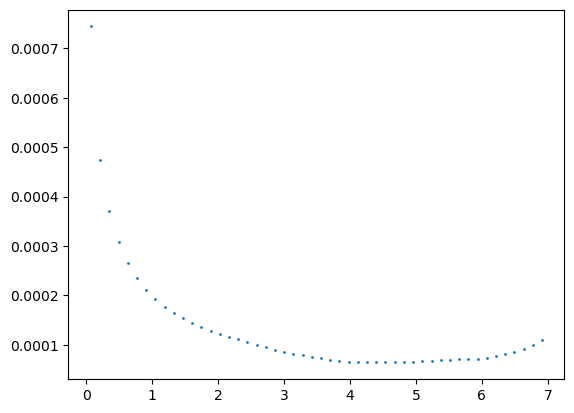

In [28]:
plt.scatter(bin_centers_sample_variance, np.sqrt(binned_ps_sample_variance), s=1)

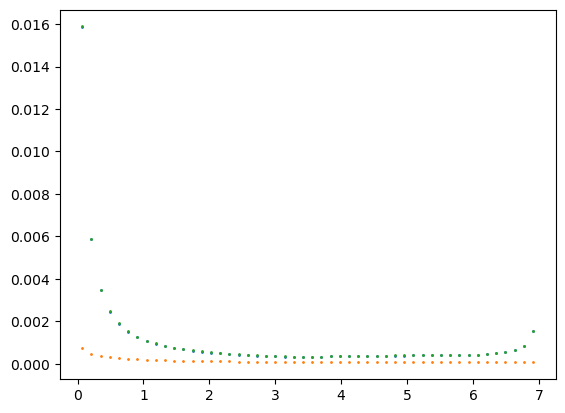

In [29]:
combined_variance = binned_ps_sample_variance + binned_ps_variance
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)
plt.scatter(bin_centers, np.sqrt(binned_ps_sample_variance), s=1)
plt.scatter(bin_centers, np.sqrt(combined_variance), s=1)

(1e-05, 0.1)

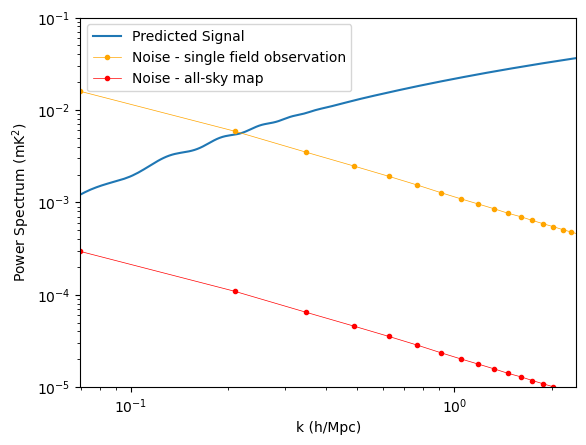

In [71]:
plt.plot(k, power_new, label="Predicted Signal")
plt.plot(bin_centers, np.sqrt(combined_variance), ".-", label="Noise - single field observation", color="orange", linewidth=.5)
plt.plot(bin_centers, np.sqrt(combined_variance/n_fields), ".-", label="Noise - all-sky map", color="red", linewidth=.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-5,1e-1)

/var/folders/x0/sh3xmymj56x6t_05l6hx76zw0000gn/T/ipykernel_81216/1219907692.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".--" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance), ".--", label="Sampling Noise - 10.6 sq. deg.", linewidth=.7, color=colors[4], marker="v")
/var/folders/x0/sh3xmymj56x6t_05l6hx76zw0000gn/T/ipykernel_81216/1219907692.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".--" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance/n_fields), ".--", label="Sampling Noise - 3$\pi$ sr.", linewidth=.7, color=colors[5], marker="v")


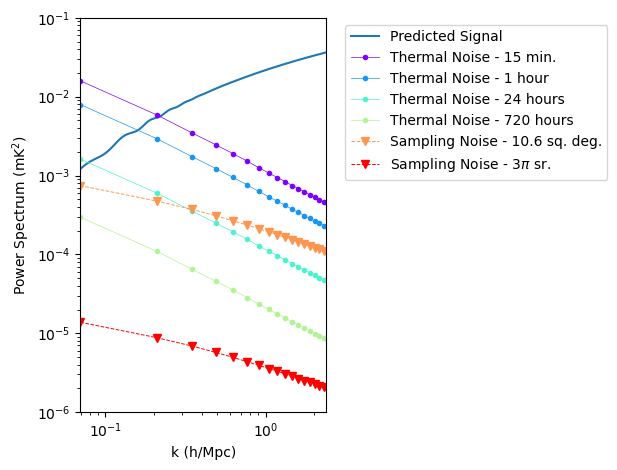

In [69]:

plt.plot(k, power_new, label="Predicted Signal")

n_lines = 6
colors = plt.cm.rainbow(np.linspace(0, 1, n_lines))
plt.plot(bin_centers, np.sqrt(binned_ps_variance), ".-", label="Thermal Noise - 15 min.", linewidth=.5, color=colors[0])
plt.plot(bin_centers, np.sqrt(binned_ps_variance/4), ".-", label="Thermal Noise - 1 hour", linewidth=.5, color=colors[1])
plt.plot(bin_centers, np.sqrt(binned_ps_variance/4/24), ".-", label="Thermal Noise - 24 hours", linewidth=.5, color=colors[2])
plt.plot(bin_centers, np.sqrt(binned_ps_variance/4/720), ".-", label="Thermal Noise - 720 hours", linewidth=.5, color=colors[3])

plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance), ".--", label="Sampling Noise - 10.6 sq. deg.", linewidth=.7, color=colors[4], marker="v")
plt.plot(bin_centers, np.sqrt(binned_ps_sample_variance/n_fields), ".--", label="Sampling Noise - 3$\pi$ sr.", linewidth=.7, color=colors[5], marker="v")

plt.yscale("log")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-6,1e-1)
plt.tight_layout()
plt.show()

In [32]:
ps_model_interp = np.interp(bin_centers, k, power_new)

Text(0.5, 0, 'k (h/Mpc)')

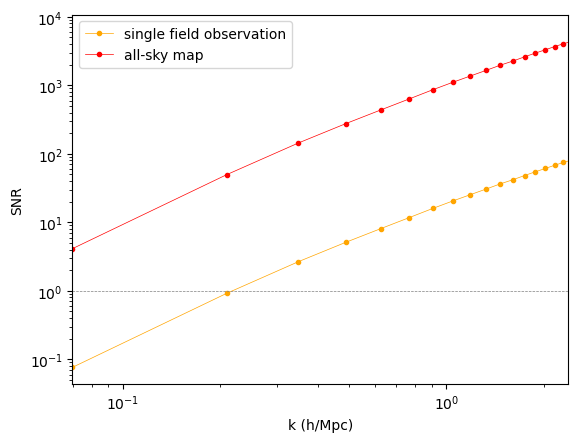

In [72]:
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance), ".-", label="single field observation", color="orange", linewidth=0.5)
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance/n_fields), ".-", label="all-sky map", color="red", linewidth=0.5)
plt.plot([np.min(bin_centers), np.max(bin_centers)], [1,1], "--", color="grey", linewidth=0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("SNR")
plt.xlabel("k (h/Mpc)")

In [34]:
nsamples_offzenith, bin_centers, binned_ps_variance_offzenith, nsamples_2d_offzenith, bin_centers_kperp, bin_centers_kpar, binned_ps_variance_2d_offzenith = dsa2000_sensitivity.delay_ps_sensitivity_analysis(zenith_angle=60.)

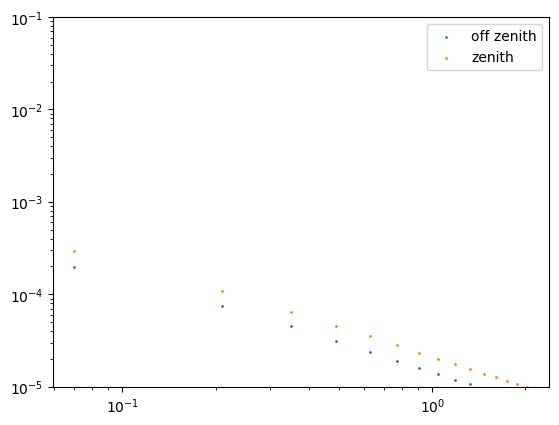

In [35]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance_offzenith/n_fields), s=1, label="off zenith")
plt.scatter(bin_centers, np.sqrt(binned_ps_variance/n_fields), s=1, label="zenith")
plt.xlim([np.min(bin_centers-1e-2),np.max(k)])
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-5,1e-1)
plt.legend()

(1e-05, 0.1)

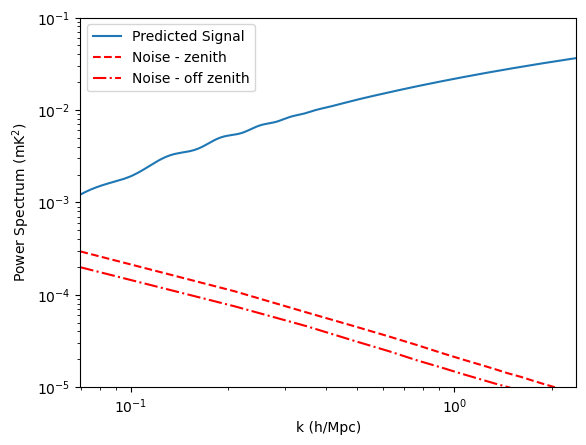

In [36]:
combined_variance_offzenith = binned_ps_variance_offzenith+binned_ps_sample_variance
plt.plot(k, power_new, label="Predicted Signal")
plt.plot(bin_centers, np.sqrt(combined_variance/n_fields), "--", label="Noise - zenith", color="red")
plt.plot(bin_centers, np.sqrt(combined_variance_offzenith/n_fields), "-.", label="Noise - off zenith", color="red")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("Power Spectrum (mK$^2$)")
plt.xlabel("k (h/Mpc)")
plt.ylim(1e-5,1e-1)

Text(0.5, 0, 'k (h/Mpc)')

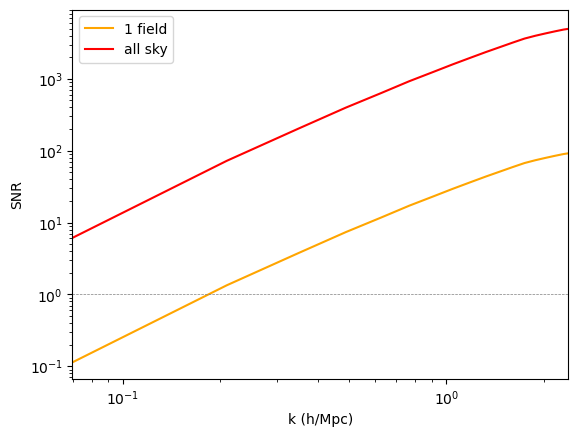

In [37]:
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance_offzenith), "-", label="1 field", color="orange")
plt.plot(bin_centers, ps_model_interp/np.sqrt(combined_variance_offzenith/n_fields), "-", label="all sky", color="red")
plt.plot([np.min(bin_centers), np.max(bin_centers)], [1,1], "--", color="grey", linewidth=0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim([np.min(bin_centers),np.max(k)])
plt.ylabel("SNR")
plt.xlabel("k (h/Mpc)")

In [44]:
min_freq_hz = 0.7e9
max_freq_hz = c / 0.21
freq_hz = np.mean([min_freq_hz, max_freq_hz])
tsys_k = 25
aperture_efficiency = 0.62
antenna_diameter_m = 5
freq_resolution_hz = 162.5e3
int_time_s = 720.*60.*60.  # Test 720 hours

visibility_stddev_mk = dsa2000_sensitivity.get_visibility_stddev(
    freq_hz=freq_hz,
    tsys_k=tsys_k,
    aperture_efficiency=aperture_efficiency,
    antenna_diameter_m=antenna_diameter_m,
    freq_resolution_hz=freq_resolution_hz,
    int_time_s=int_time_s,
)
print(visibility_stddev_mk**2.0)
freq_array_hz = np.arange(min_freq_hz, max_freq_hz, freq_resolution_hz)
delay_visibility_variance = visibility_stddev_mk**2.0 * len(freq_array_hz)
print(delay_visibility_variance)

3.160607657941472e-08
0.00014172164738209558


In [90]:
meerkat_min_baseline_m = 29
meerkat_max_baseline_m = 8000
meerkat_min_freq_hz = 0.58e9
meerkat_max_freq_hz = 1.67e9

In [106]:
# Meerkat max redshift
meerkat_max_redshift = c/meerkat_min_freq_hz/.21-1
print(meerkat_max_redshift)

1.4630541871921183


In [117]:
meerkat_min_resolution_deg = np.degrees(np.arcsin(.21/meerkat_max_baseline_m))
print(meerkat_min_resolution_deg)
print(meerkat_min_resolution_deg*60*60)
meerkat_max_resolution_deg = np.degrees(np.arcsin(c/meerkat_min_freq_hz/meerkat_min_baseline_m))
print(meerkat_max_resolution_deg)

0.0015040142123911374
5.414451164608095
1.0219765356802872


In [114]:
dsa_min_baseline_m = np.min(np.sqrt(np.sum(baselines_m**2., axis=1)))
print(dsa_min_baseline_m)
dsa_max_baseline_m = np.max(np.sqrt(np.sum(baselines_m**2., axis=1)))
print(dsa_max_baseline_m)

8.849800732219943
15393.622563988927


In [126]:
dsa_min_resolution_deg = np.degrees(np.arcsin(.21/dsa_max_baseline_m))
print(dsa_min_resolution_deg)
print(dsa_min_resolution_deg*60.*60.)
dsa_max_resolution_deg = np.degrees(np.arcsin(c/min_freq_hz/dsa_min_baseline_m))
print(dsa_max_resolution_deg)

0.0007816297722063044
2.8138671799426955
2.7757621685881153


In [127]:
kx_test, ky_test, kz_test = dsa2000_sensitivity.uvf_to_cosmology_axis_transform(
    np.array([dsa_min_baseline_m/(c/min_freq_hz)]),
    np.array([0]),
    np.array([c/.21]),
    1,
)

In [128]:
print(kx_test)

[0.02070432]


In [129]:
kx_test, ky_test, kz_test = dsa2000_sensitivity.uvf_to_cosmology_axis_transform(
    np.array([dsa_max_baseline_m/.21]),
    np.array([0]),
    np.array([c/.21]),
    1,
)

In [130]:
print(kx_test)

[73.49742968]
